In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Heart Disease Capstone
According to the CDC, heart disease still remains the number one cause of mortality in the United States. With the increasing prevalence of metabolic diseases including diabetes, heart disease, hypertension, and stroke, research into this field is paramount into reducing mortality rates, hospital visits, and ultimately the cost of rising healthcare in the United States.

### Heart Disease Dataset
This dataset is derived from the Cleveland database and contains data from 303 male and female patients aged 29 to 77 years old. Included are data of resting blood pressure on admission, serum cholesterol, fasting blood sugar, resting EKG, maximum heart rate, exercise induced angina, ST depressions induced by exercise relative to rest, slope of peak exercise ST segment, number of major coronary arteries colored by fluoroscopy, stress thalium results, and whether or not the patient classified as having the presence of heart disease.

The dataset was retrieved from Kaggle at https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
df = pd.read_csv('heart.csv')

## 1) Exploratory Analysis
First, we will take a look at some information of the dataset. We are looking at group statistics, trends, and outliers to determine if we can create a testable hypothesis.

In [3]:
#View columns and investigate for any string abnormalities
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Column Information
    1. age = age in years
    2. sex = (1 for male, 0 for female)
    3. cp = Chest pain type (1. Angina, 2. Atypical angina, 3. Non-anginal pain, 4. Asymptomatic)
    4. trestbps = Systolic resting blood pressure upon admission
    5. chol = Serum Cholesterol (mg/dl)
    6. fbs = Fasting blood sugar (1 for > 120mg/dl, 0 for < 120mg/dl)
    7. restecg = Resting EKG (0 for normal sinus rhythm, 1 for ST or T wave abnormalities, 2 for LVH)
    8. thalach = Heart rate achieved on a stress test
    9. exang = Exercise induced angina
    10. oldpeak = ST depression induced by exercise relative to rest
    11. slope = slope of the peak exercise ST segment
    12. ca = number of coronary arteries (0 to 3) colored by fluoroscopy
    13. thal = number of coronary arteries (0 to 3) colored by thallium during stress test
    14. target = (1 for any classification of heart disease, 0 for normal)

In [4]:
#View columns, datatypes, columns, and inspect for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
print("Gender counts:\n" + str(df.sex.value_counts()))
print("Heart Disease counts:\n" + str(df.target.value_counts()))

Gender counts:
1    207
0     96
Name: sex, dtype: int64
Heart Disease counts:
1    165
0    138
Name: target, dtype: int64


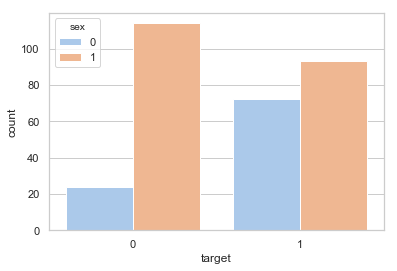

In [96]:
sns.countplot(x='target', data=df, hue='sex', palette='pastel')
plt.show()

### Dataset analysis
From the prelimary analysis, we see that we have columns correctly labeled, 303 rows with all columns displaying non-null values, and all correctly typed as integer values or float. We are looking at 14 columns of variables representing 303 patients. There appear to also be twice as many males as females included in this study.

Also of note is that there are more females (sex=0) diagnosed with heart disease (target=1) than males.

### Summary Statistics
We have an age mean of 54 which is consistent with the notion that chest pain patients are typically older. Maximum and minimum systolic blood pressure values are not atypical in the clinical setting for patients. No negative values or outliers are seen except for a cholesterol level of 564. Resting blood pressure of 200 is also considered an outlier in this dataset, but is not uncommon in the clinical setting. Also a maximum peak value of ST depression at 6.2 represents another outlier.

## 2) Visual Analysis
Using matplotlib and seaborn, we will visualize the data to look at any obvious errors and possible trends

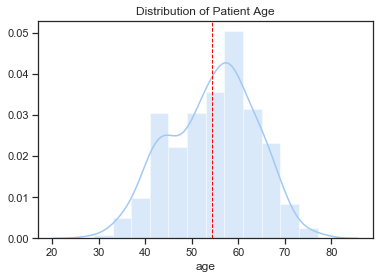

In [47]:
sns.set_style('ticks')
sns.distplot(df.age)
plt.title("Distribution of Patient Age")
plt.axvline(df['age'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

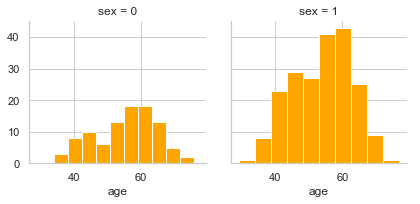

In [55]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='sex')
g = g.map(plt.hist, 'age', color='orange')
plt.show()

There appears to be more males than females and the average female age appears to be slightly older than males.

In [62]:
print(df.age.groupby(df['sex']).aggregate('mean'))
print(df.age.groupby(df['sex']).aggregate(np.sum))

sex
0    55.677083
1    53.758454
Name: age, dtype: float64
sex
0     5345
1    11128
Name: age, dtype: int64


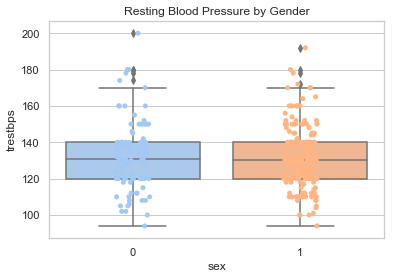

In [64]:
sns.boxplot(x='sex', y='trestbps', data=df, palette='pastel')
sns.stripplot(y='trestbps', x='sex', jitter=True, data=df)
plt.title('Resting Blood Pressure by Gender')
plt.show()

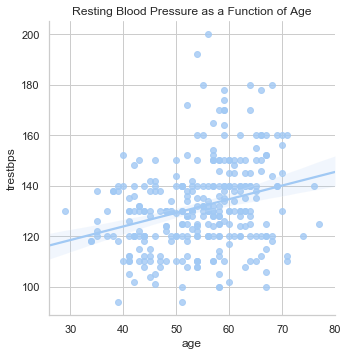

In [63]:
sns.lmplot(x='age', y='trestbps', data=df)
plt.title('Resting Blood Pressure as a Function of Age')
plt.show()

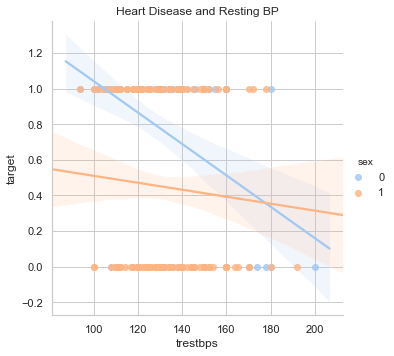

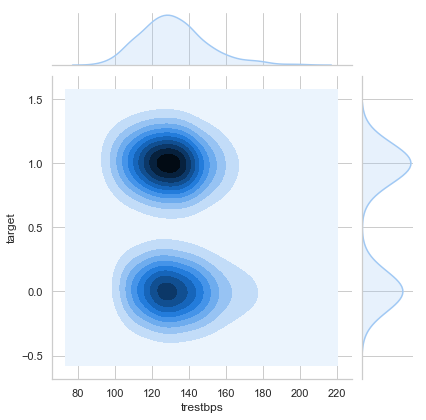

In [65]:
sns.lmplot(x='trestbps', y='target', data=df, hue='sex')
plt.title('Heart Disease and Resting BP')

sns.jointplot(x='trestbps', y='target', data=df, kind='kde')
plt.show()

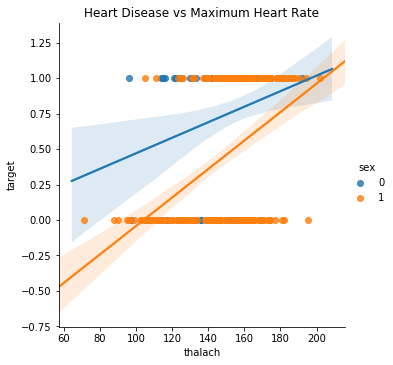

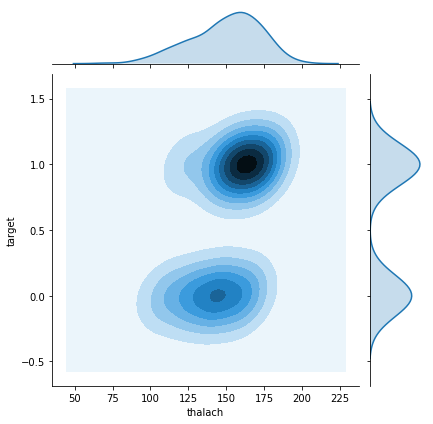

In [13]:
sns.lmplot(x='thalach', y='target', data=df, hue='sex')
plt.title('Heart Disease vs Maximum Heart Rate')
sns.jointplot(x='thalach', y='target', data=df, kind='kde')
plt.show()

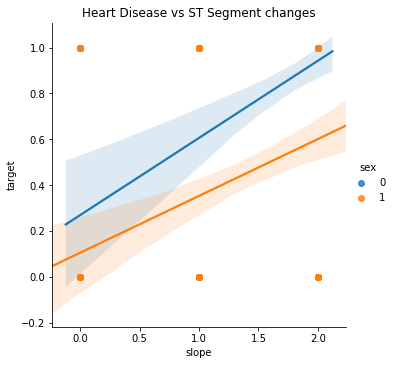

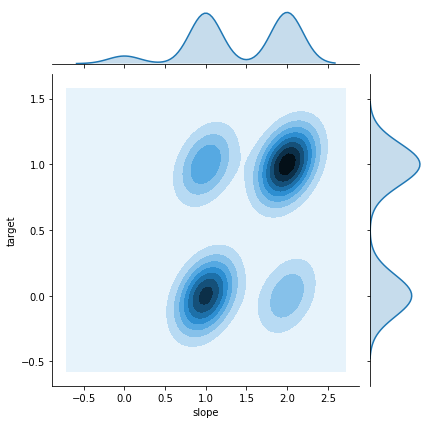

In [14]:
sns.lmplot(x='slope', y='target', data=df, hue='sex')
plt.title('Heart Disease vs ST Segment changes')
sns.jointplot(x='slope', y='target', data=df, kind='kde')
plt.show()

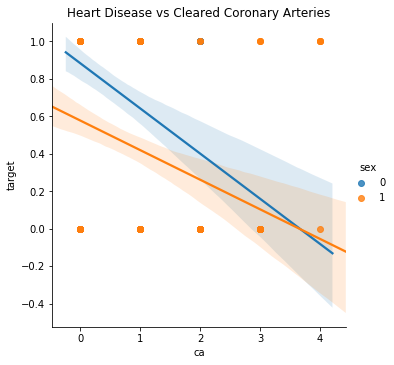

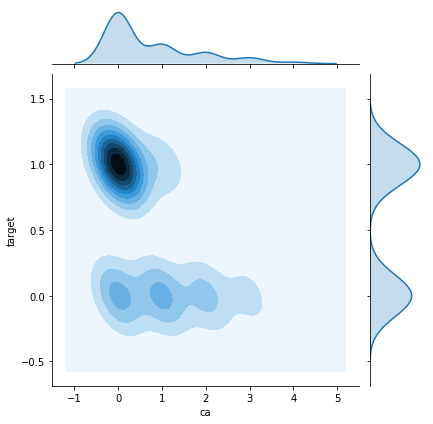

In [15]:
sns.lmplot(x='ca', y='target', data=df, hue='sex')
plt.title('Heart Disease vs Cleared Coronary Arteries')
sns.jointplot(x='ca', y='target', data=df, kind='kde')
plt.show()

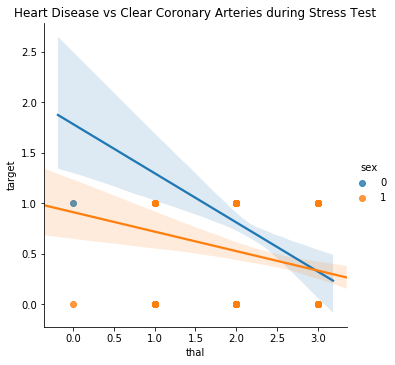

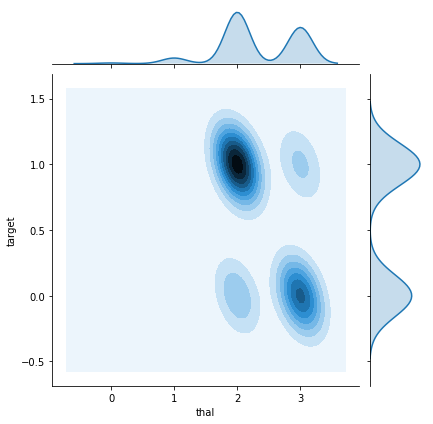

In [16]:
sns.lmplot(x='thal', y='target', data=df, hue='sex')
plt.title('Heart Disease vs Clear Coronary Arteries during Stress Test')
sns.jointplot(x='thal', y='target', data=df, kind='kde')
plt.show()

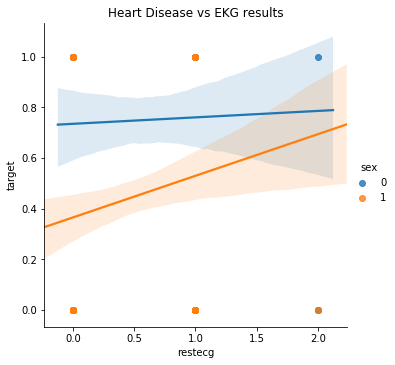

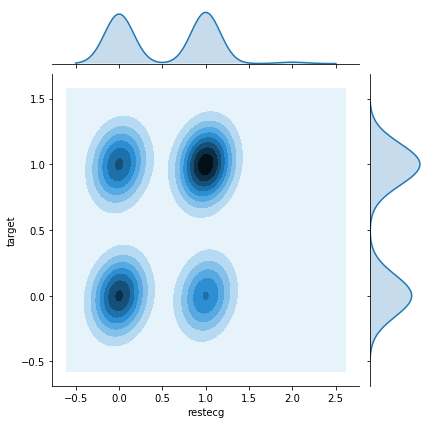

In [17]:
sns.lmplot(x='restecg', y='target', data=df, hue='sex')
plt.title('Heart Disease vs EKG results')
sns.jointplot(x='restecg', y='target', data=df, kind='kde')
plt.show()

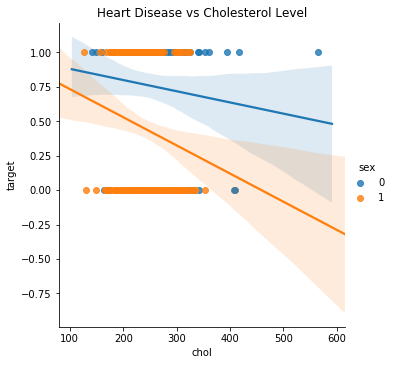

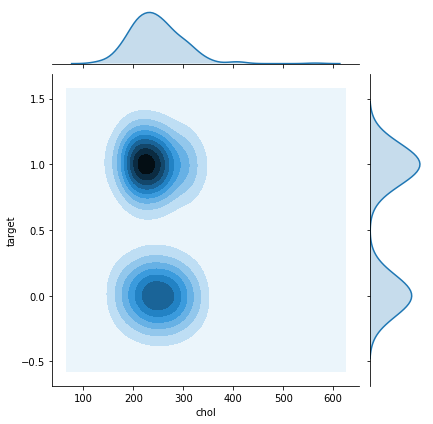

In [18]:
sns.lmplot(x='chol', y='target', data=df, hue='sex')
plt.title('Heart Disease vs Cholesterol Level')
sns.jointplot(x='chol', y='target', data=df, kind='kde')
plt.show()

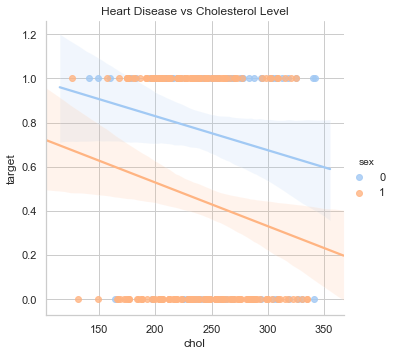

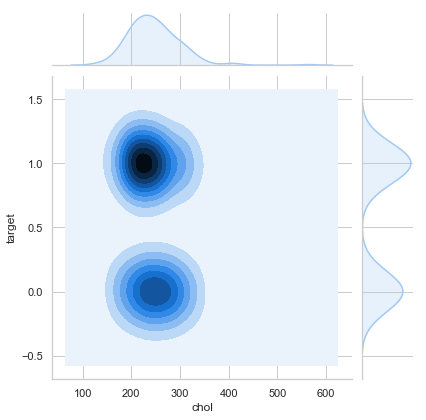

In [94]:
newchol = df[df['chol']<350]
newchol
sns.lmplot(x='chol', y='target', data=newchol, hue='sex')
plt.title('Heart Disease vs Cholesterol Level')
sns.jointplot(x='chol', y='target', data=df, kind='kde')
plt.show()

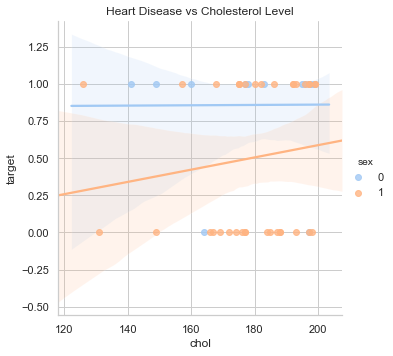

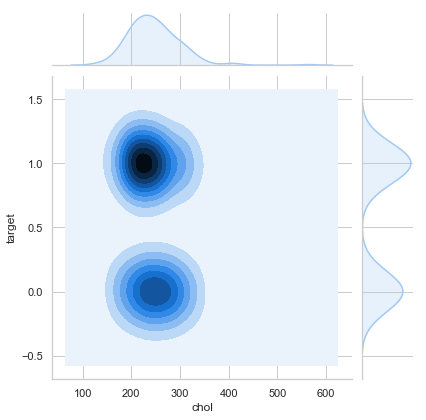

In [95]:
normchol = df[df['chol']<200]
sns.lmplot(x='chol', y='target', data=normchol, hue='sex')
plt.title('Heart Disease vs Normal Cholesterol Level')
sns.jointplot(x='chol', y='target', data=df, kind='kde')
plt.show()

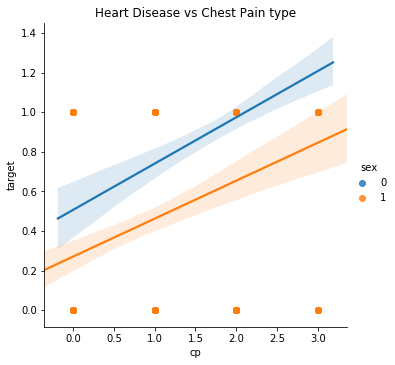

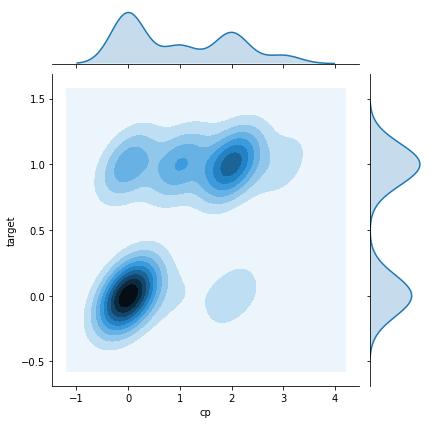

In [19]:
sns.lmplot(x='cp', y='target', data=df, hue='sex')
plt.title('Heart Disease vs Chest Pain type')
sns.jointplot(x='cp', y='target', data=df, kind='kde')
plt.show()

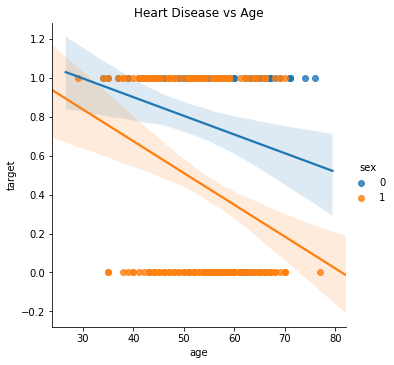

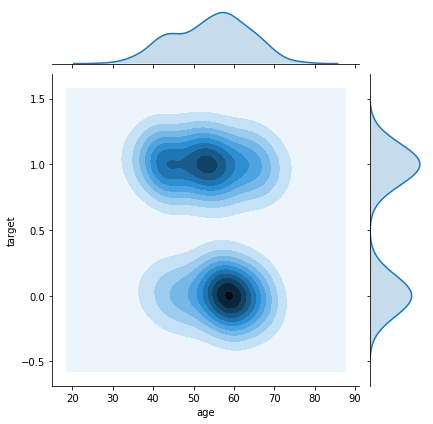

In [20]:
sns.lmplot(x='age', y='target', data=df, hue='sex')
plt.title('Heart Disease vs Age')
sns.jointplot(x='age', y='target', data=df, kind='kde')
plt.show()

In [21]:
#Creating a covariance matrix
x = StandardScaler().fit_transform(df)
xt = x.T
cx = np.cov(xt)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


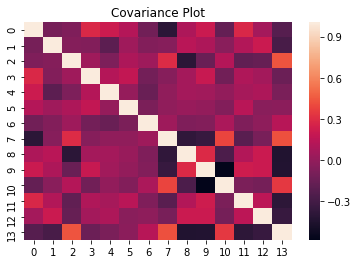

In [22]:
sns.heatmap(cx)
plt.title('Covariance Plot')
plt.show()

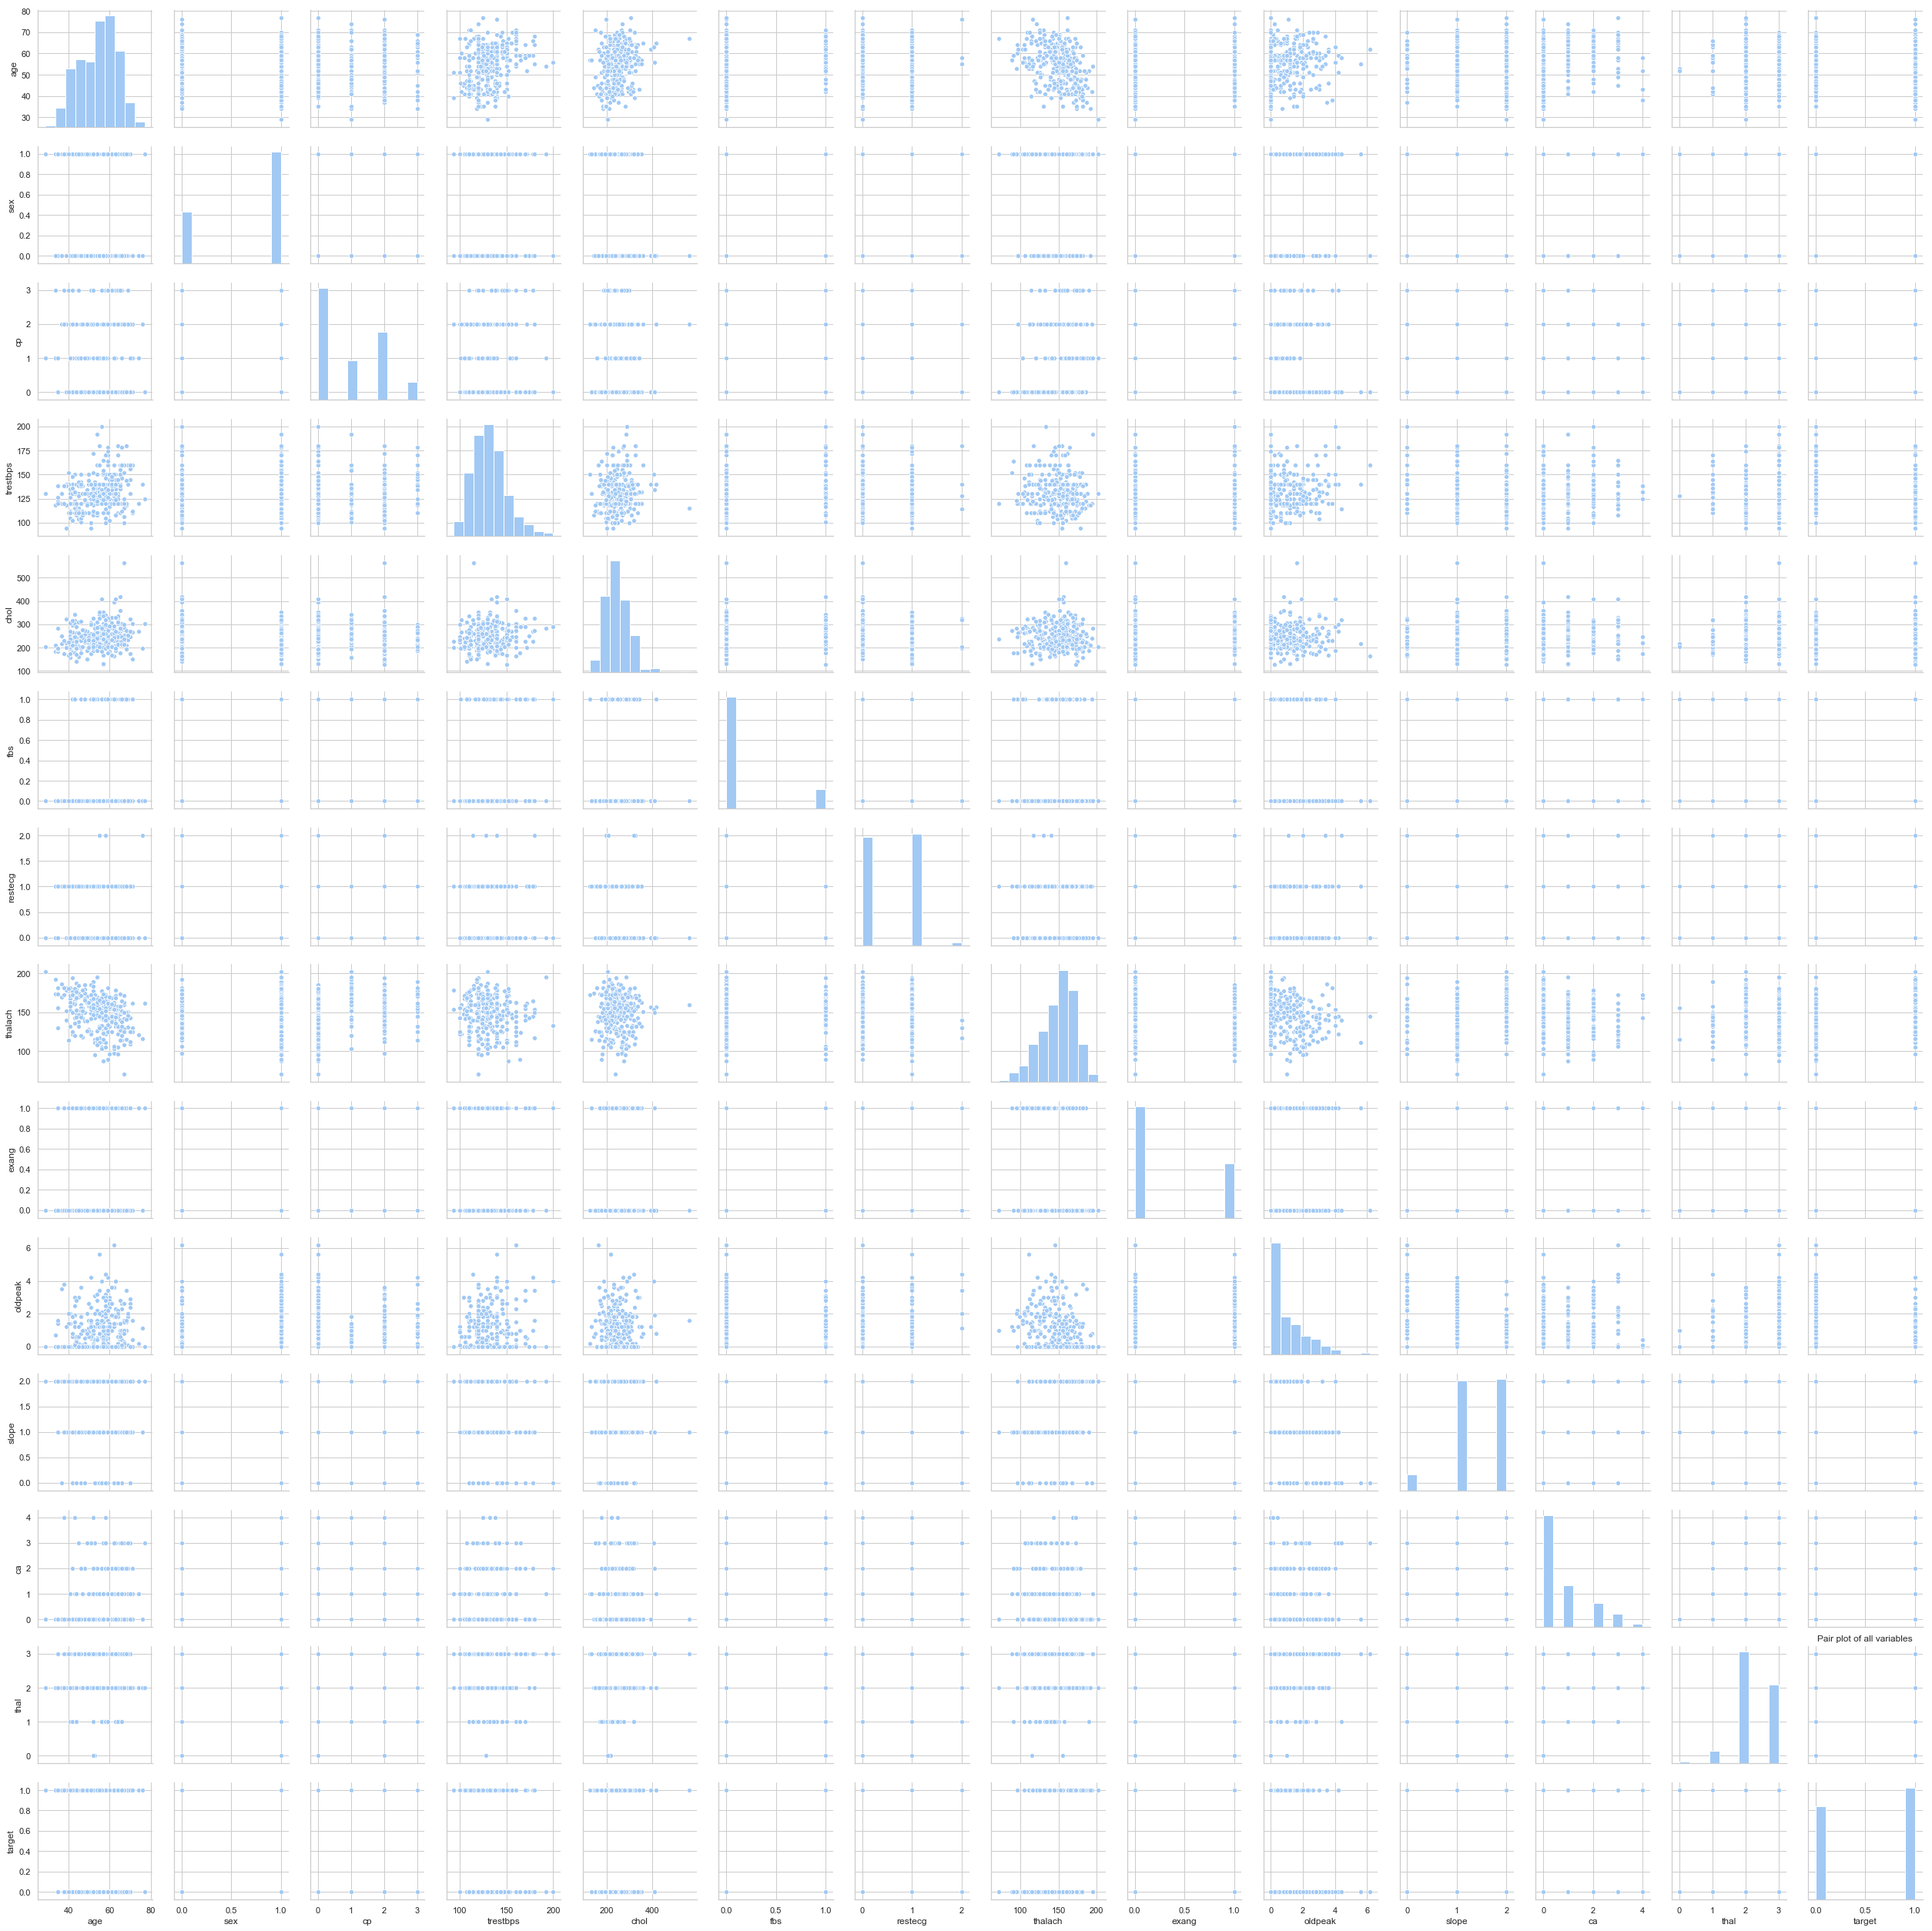

In [74]:
sns.pairplot(df)
plt.title('Pair plot of all variables')
plt.show()

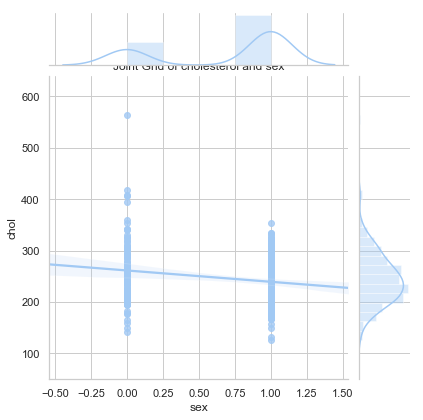

In [75]:
sns.JointGrid(x='sex', y='chol', data=df).plot(sns.regplot, sns.distplot)
plt.title('Joint Grid of cholesterol and sex')
plt.show()

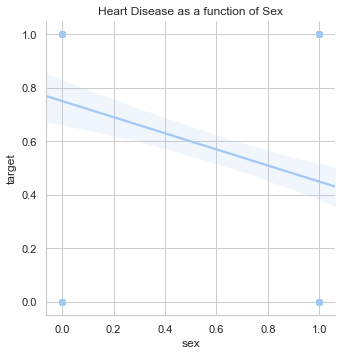

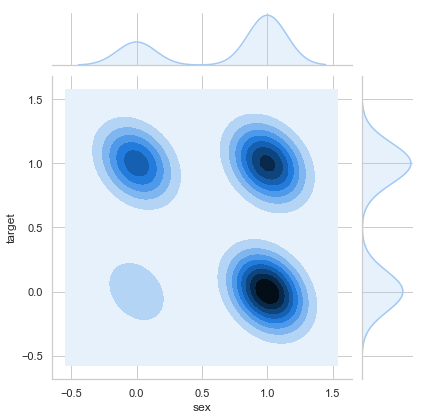

In [87]:
sns.lmplot(x='sex', y='target', data=df)
plt.title('Heart Disease as a function of Sex')
sns.jointplot(x='sex', y='target', data=df, kind='kde')
plt.show()

### Correlations
From the covariance plot we can take a look at positive and negative correlations, with lighter squares representing positive and darkest values representing negative correlations.

Positive correlations:
1. Chest pain type with Heart Disease
2. Maximum Heart Rate during Stress Testing with Heart Disease
3. Slope of ST segment peak during Stress Test with Heart Disease
4. Maximum Heart Rate during Stress Test with Type of Chest Pain
5. Slope of ST segment peak during Stress Test with Maximum Heart Rate

Negative Correlations:
1. Age and Maximum Heart Rate achieved
2. Exercise Induced Angina and Type of Chest Pain
3. Maximum Heart Rate Achieved and Exercise Induced Angina
4. Exercise Induced Angina with Heart Disease
5. ST depressions during stress test with Heart Disease
6. Coronary arteries seen with fluoroscopy or thallium with Heart Disease

Although cholesterol and blood pressure appear to be negatively correlated with heart disease in our dataset, it's important to note that looking at the heat maps show a distribution of data the severely skews the trend in one direction. Looking at the regression plots show quite a bit of variance.

Again, cholesterol and blood pressure have a few data points that represent outliers. After trimming and reviewing, cholesterol still appears to have a negative correlation with heart disease. However, we do not have enough information to know whether patients are using statin medications that may be indicative of metabolic disorders leading to greater risk of heart disease.

In addition, resting blood pressure before admission may not be a good indication of heart disease as that value could be measured after being treated in an ambulance or the emergency department with nitroglycerin following AHA guidelines. (Nitroglycerin reduces CP by vasodilation which lowers BP)


## 3) Research Plan
### Problem
Heart disease is one of the leading causes of death around the world. Our ability to screen for it can help prevent individuals from getting placed in the hospital. Solving this issue would not only prevent disease and death, but also curb rising healthcare costs for the entire nation.

### Potential Solution
I propose that we can use data on diagnosed heart disease patients to develop a screening method.

### Hypothesis
Based on this preliminary data, I hypothesize that higher than normal serum total cholesterol may actually have a protective effect in preventing heart disease.

### Rollout plan
In order to evaluate this hypothesis, I propose a research study in which patients arriving to the hospital for chest pain are evaluated for heart disease. The outcome of interest we will be observing is the diagnoses of heart disease. Coronary artery blockage using fluorscopy and thallium imaging during stress tests will be used to verify heart disease diagnoses. 

Our control group will be patients with normal levels of total serum cholesterol (under 200mg/dl). The test group will be patients above normal levels.

We do, however, know that there are more aspects to cholesterol than just total serum amount. The ratio or amount of high density (HDL) and low density lipoproteins (LDL), as well as the presence of very low density lipoproteins (VLDL) may influence heart disease outcomes. These data should also be measured in addition to the total amount of cholesterol.

Other measured variables will include the variables included in our dataset. The experiment will need to be controlled for age, sex, chest pain type, and statin medication usage. 

### Evaluation plan
A/B Testing between the two groups will be used to determine statistical significance with a confidence interval of 95% or p value <0.05. T-tests will be used to determine the number of patients needed for statistical power.
